# Dataset Description kaggle

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Crab Age Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Note: You can use this notebook to generate additional synthetic data for this competition if you would like.

Files
* train.csv - the training dataset; 
* Age is the target
* test.csv - the test dataset; your objective is to predict the probability of Age (the ground truth is int but you can predict int or float)
* sample_submission.csv - a sample submission file in the correct format

The Python "ModuleNotFoundError: No module named 'xgboost'" occurs when we forget to install the xgboost module before importing it or install it in an incorrect environment.

To solve the error, install the module by running the "pip install xgboost command", same with catboost and lightgbm.

In [65]:
!pip3 install xgboost
!pip3 install catboost
!pip3 install lightgbm

#  Import Libraries

* import pandas as pd
Pandas is mostly used for data analysis tasks in Python.  Pandas library works well for numeric, alphabets, and heterogeneous types of data simultaneously.
* import numpy as np
NumPy is mostly used for working with Numerical values as it makes it easy to apply mathematical functions.
* import matplotlib.pyplot as plt
Matplotlib is a cross-platform, data visualization and graphical plotting library (histograms, scatter plots, bar charts, etc) for Python and its numerical extension NumPy. As such, it offers a viable open source alternative to MATLAB. Developers can also use matplotlib’s APIs (Application Programming Interfaces) to embed plots in GUI applications.
* import seaborn as sns
Python Seaborn library is a widely popular data visualization library that is commonly used for data science and machine learning tasks. You build it on top of the matplotlib data visualization library and can perform exploratory analysis. You can create interactive plots to answer questions about your data.
* from IPython import get_ipython
Simple function to call to get the current InteractiveShell instance. Get the global InteractiveShell instance.Returns None if no InteractiveShell instance is registered.
* import plotly.express as px
* import plotly.graph_objects as go
The plotly.express module (usually imported as px) contains functions that can create entire figures at once, and is referred to as Plotly Express or PX. Plotly Express is a built-in part of the plotly library, and is the recommended starting point for creating most common figures. Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.
* import warnings
Warnings are provided to warn the developer of situations that aren’t necessarily exceptions. Usually, a warning occurs when there is some obsolete of certain programming elements, such as keyword, function or class, etc. A warning in a program is distinct from an error. The warn() function defined in the ‘warning‘ module is used to show warning messages. The warning module is actually a subclass of Exception which is a built-in class in Python.
* warnings.filterwarnings('ignore')
suppress all warnings generated by program code

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Import Data

In [12]:
# Read a comma-separated values (csv) file into DataFrame.
df = pd.read_csv("C:\\Users\\sohin\\OneDrive\\Documents\\Kaggle Dataset\\train.csv\\train.csv")
df

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


# Exploratory Data Analysis

In [13]:
# The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [14]:
# The duplicated() method returns a Series with True and False values that describe which rows in the DataFrame are duplicated and not and taking sum of the values if at all duplicated.
df.duplicated().sum()

0

In [15]:
# isnull(). sum() returns the sum of the number of missing values in the dataset.
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [16]:
#  The nunique() method returns the number of unique values for each column. By specifying the column axis ( axis='columns' ), the nunique() method searches column-wise and returns the number of unique values for each row.
df.nunique()

id                74051
Sex                   3
Length              144
Diameter            122
Height               65
Weight             3096
Shucked Weight     1766
Viscera Weight      967
Shell Weight       1048
Age                  28
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,74051.0,37025.000000,21376.826729,0.000000,18512.500000,37025.000000,55537.500000,74050.000000
Length,74051.0,1.317460,0.287757,0.187500,1.150000,1.375000,1.537500,2.012815
Diameter,74051.0,1.024496,0.237396,0.137500,0.887500,1.075000,1.200000,1.612500
Height,74051.0,0.348089,0.092034,0.000000,0.300000,0.362500,0.412500,2.825000
Weight,74051.0,23.385217,12.648153,0.056699,13.437663,23.799405,32.162508,80.101512
Shucked Weight,74051.0,10.104270,5.618025,0.028349,5.712424,9.908150,14.033003,42.184056
Viscera Weight,74051.0,5.058386,2.792729,0.042524,2.863300,4.989512,6.988152,21.545620
Shell Weight,74051.0,6.723870,3.584372,0.042524,3.968930,6.931453,9.071840,28.491248
Age,74051.0,9.967806,3.175189,1.000000,8.000000,10.000000,11.000000,29.000000


In [18]:
df = df.drop('id', axis=1)

In [19]:
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1,'I':2})

# Data Visualisation

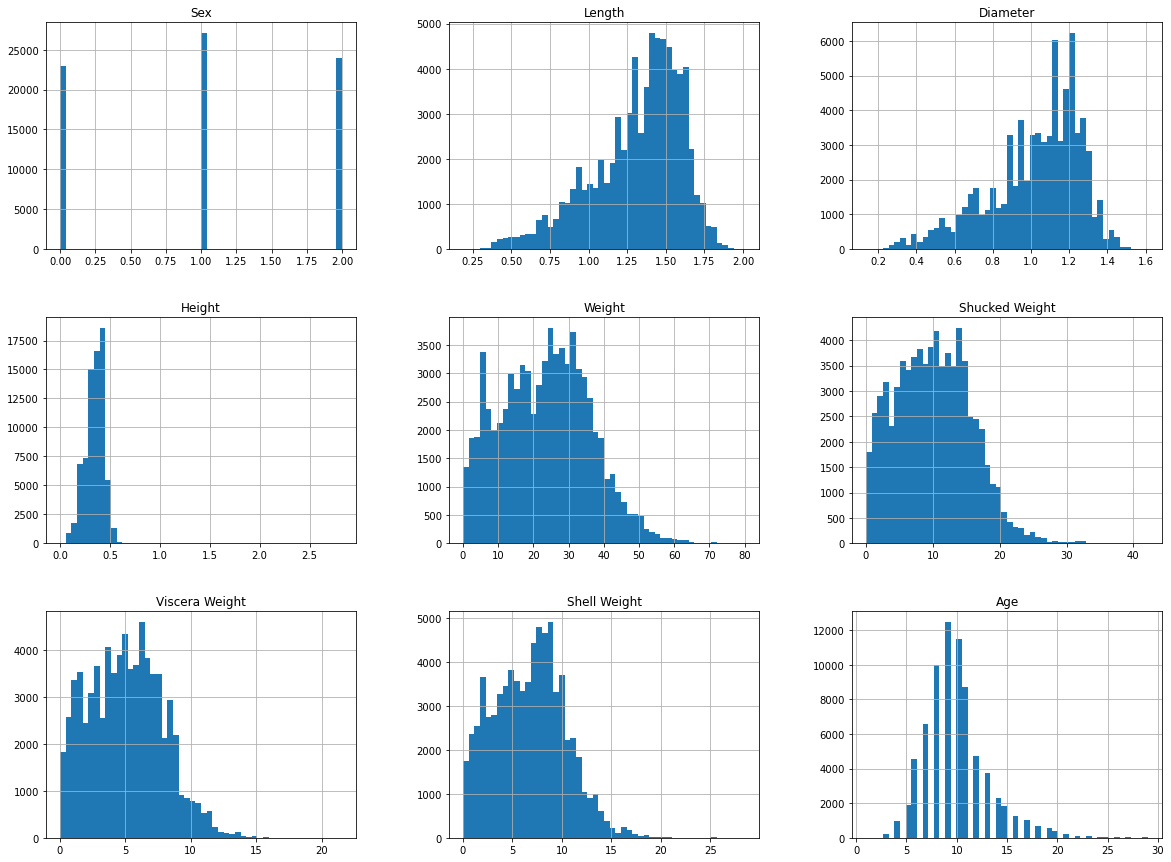

In [20]:
df.hist(bins=50, figsize=(20,15))
plt.show()

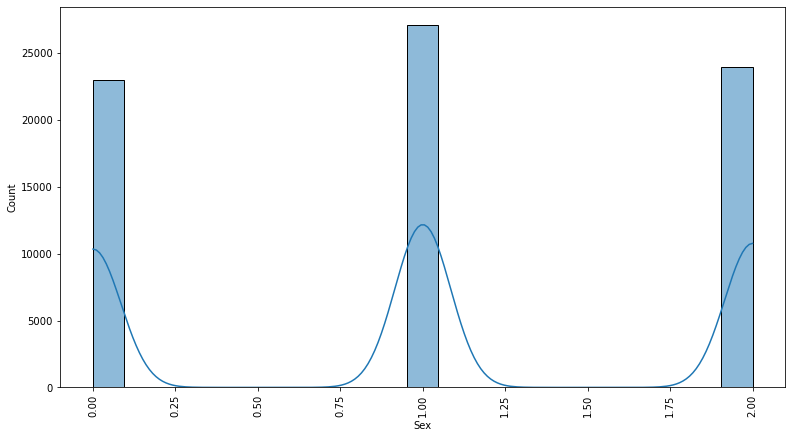

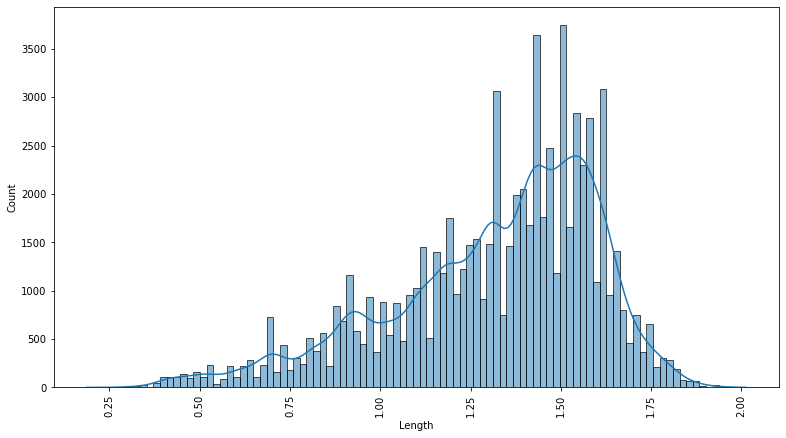

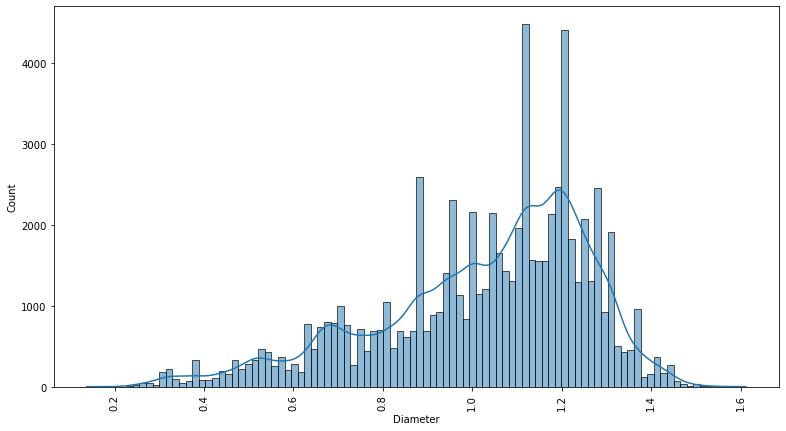

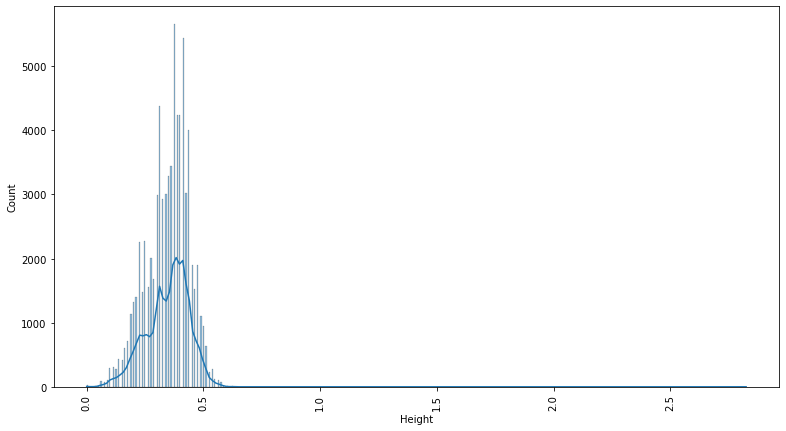

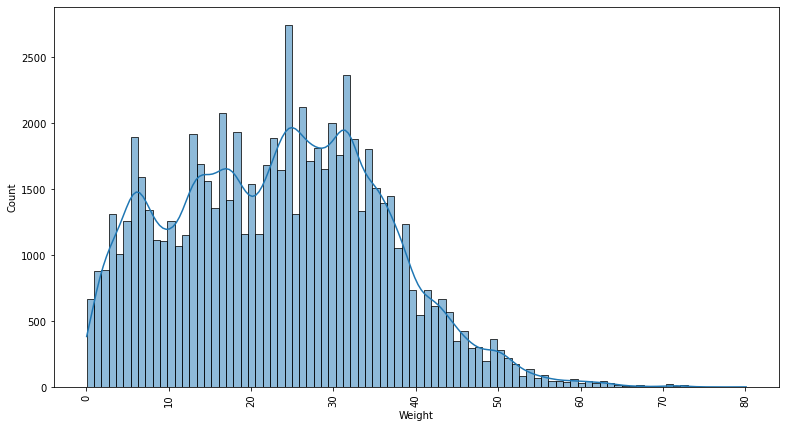

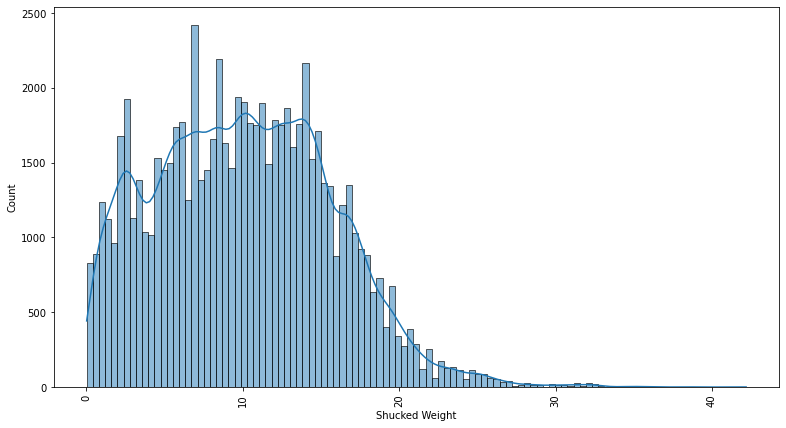

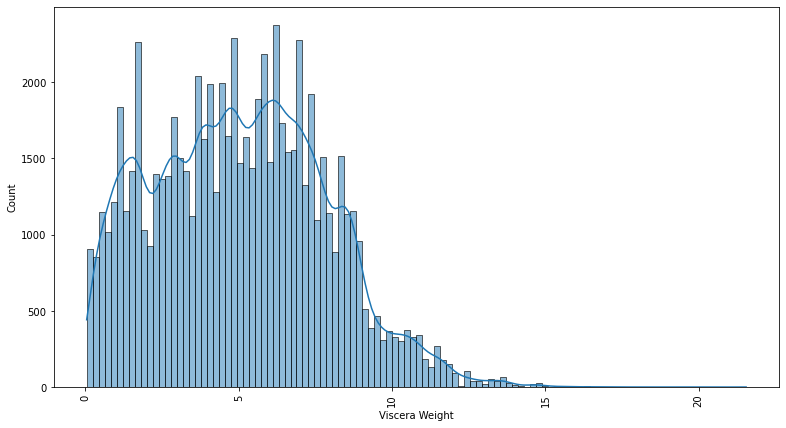

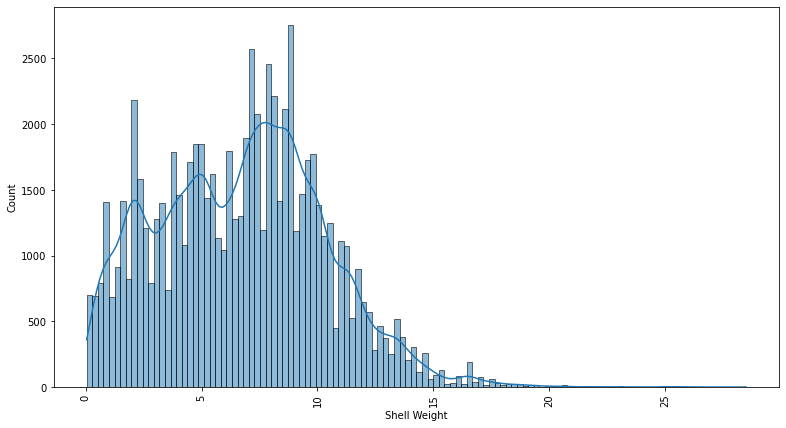

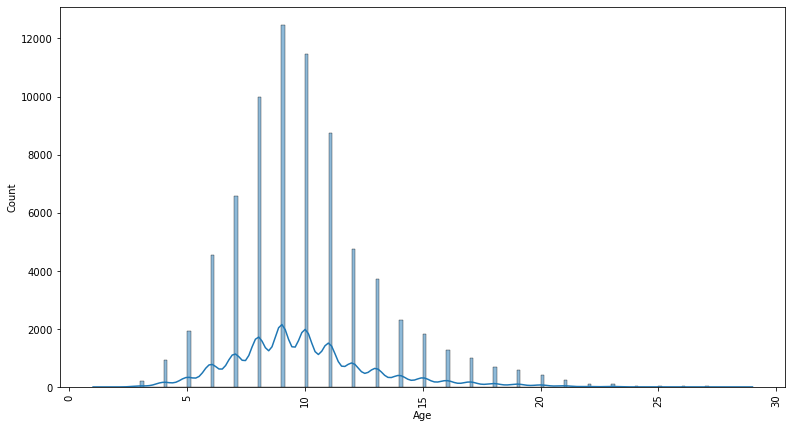

In [21]:
for i in df.columns:
    plt.figure(figsize=(13,7))
    sns.histplot(data = df[i], kde=True, multiple='stack')
    plt.xticks(rotation=90)
    plt.show()

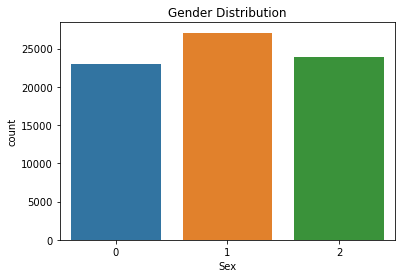

In [22]:
# Bar plot for gender
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

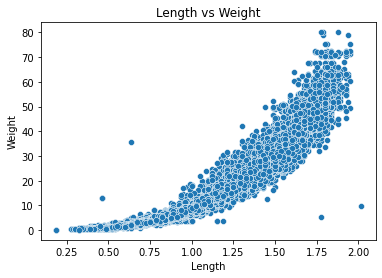

In [23]:
#Scatter plot between Length and Weight
sns.scatterplot(x='Length', y='Weight', data=df)
plt.title('Length vs Weight')
plt.show()

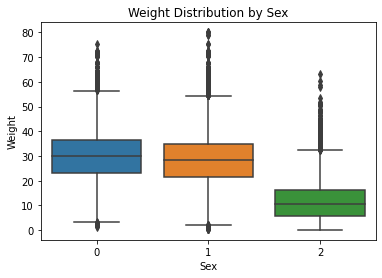

In [24]:
#Box plot of Weight by Sex
sns.boxplot(x='Sex', y='Weight', data=df)
plt.title('Weight Distribution by Sex')
plt.show()

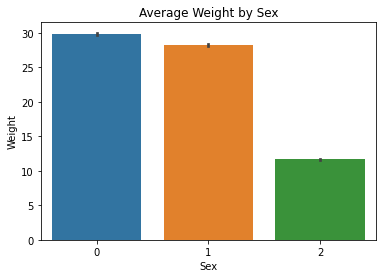

In [25]:
#Box plot of Weight by Sex
sns.barplot(x='Sex', y='Weight', data=df, estimator=np.mean)
plt.title('Average Weight by Sex')
plt.show()

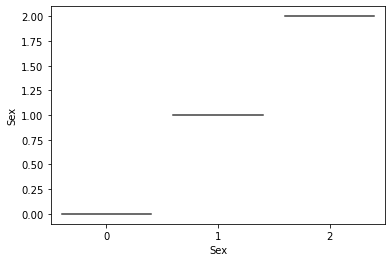

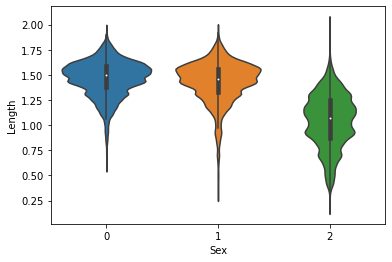

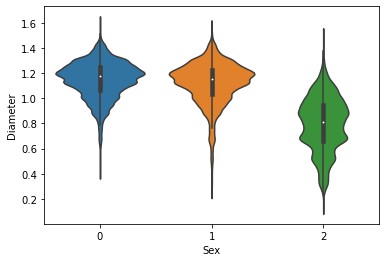

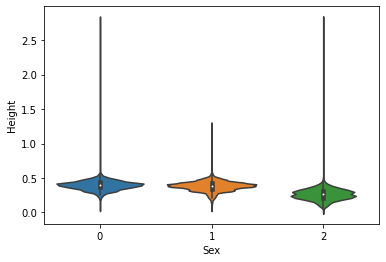

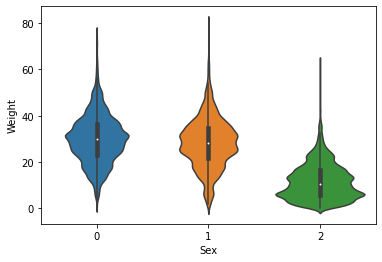

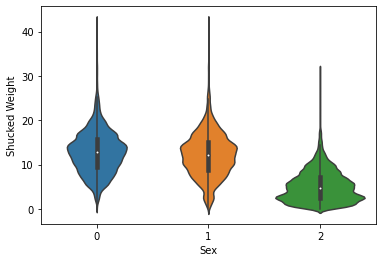

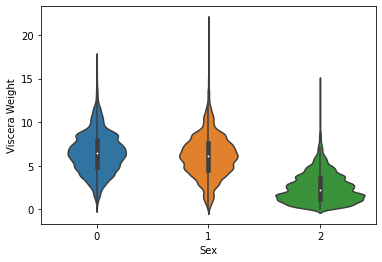

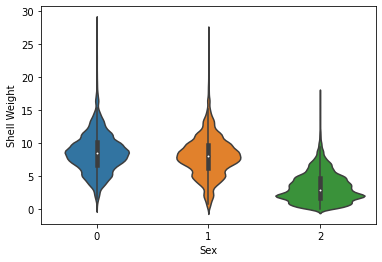

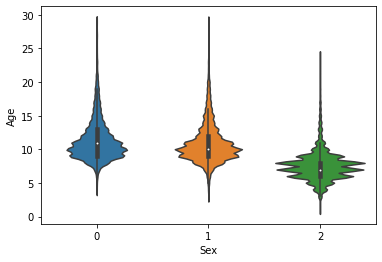

In [26]:
for column in df.select_dtypes(include=[np.number]).columns:
    sns.violinplot(x='Sex', y=column, data=df)
    plt.show()

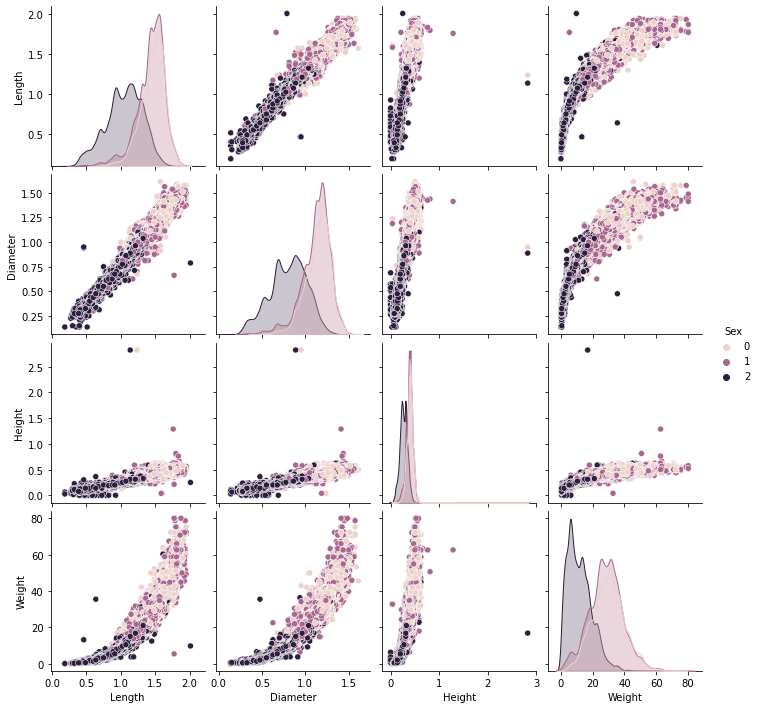

In [27]:
sns.pairplot(df, vars=["Length", "Diameter", "Height", "Weight"], hue="Sex")
plt.show()

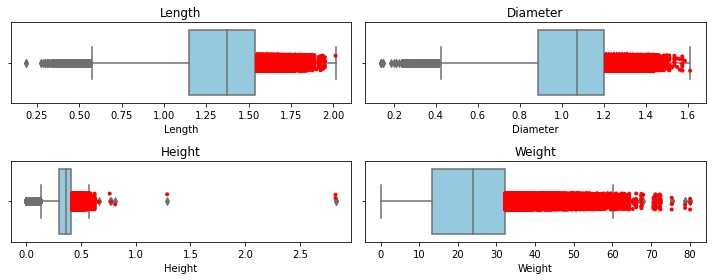

In [28]:
col=["Length", "Diameter", "Height", "Weight"]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 4))
axs = axs.flatten()

for i, col_name in enumerate(col):
    sns.boxplot(x=df[col_name], ax=axs[i], color='skyblue')
    sns.stripplot(x=df[col_name][df[col_name] > df[col_name].quantile(0.75)], ax=axs[i], color='red', size=4)
    axs[i].set_title(col_name)
    if i == len(col)-1:
        break

fig.tight_layout()

# Show the plot
plt.show()

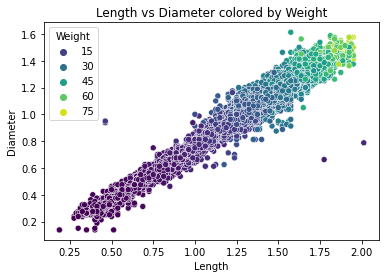

In [29]:
sns.scatterplot(x='Length', y='Diameter', hue='Weight', data=df, palette='viridis')
plt.title('Length vs Diameter colored by Weight')
plt.show()

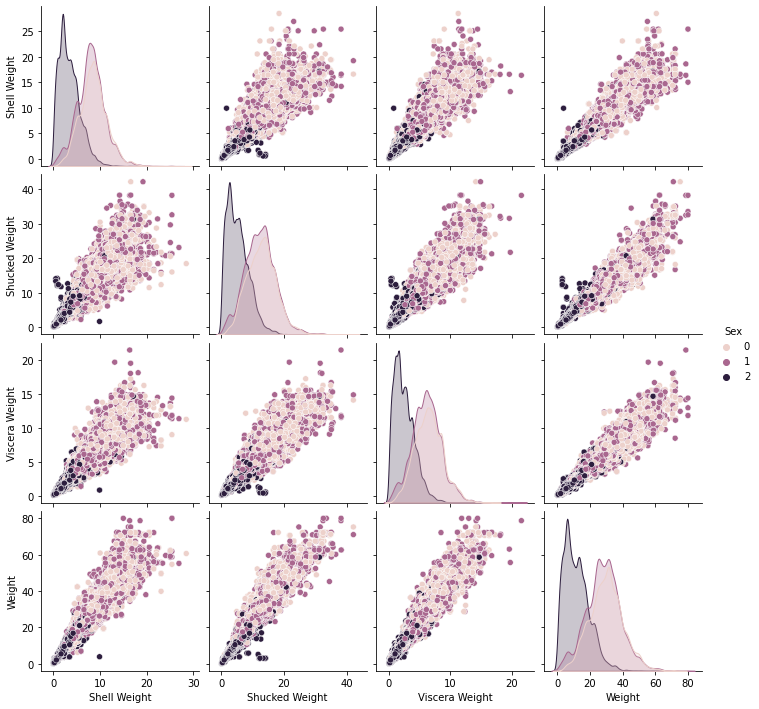

In [30]:
sns.pairplot(df, vars=["Shell Weight", "Shucked Weight", "Viscera Weight", "Weight"], hue='Sex')

<AxesSubplot:xlabel='Length', ylabel='Weight'>

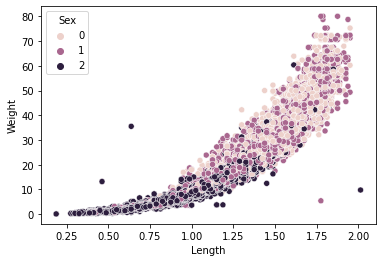

In [31]:
sns.scatterplot(x='Length', y='Weight', hue='Sex', data=df)

<AxesSubplot:xlabel='Diameter', ylabel='Weight'>

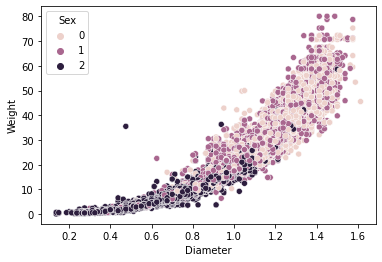

In [32]:
sns.scatterplot(x='Diameter', y='Weight', hue='Sex', data=df)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

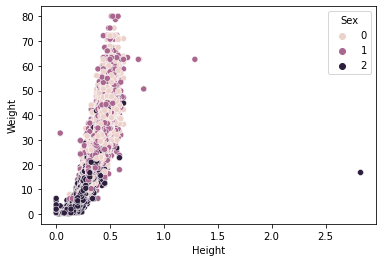

In [33]:
sns.scatterplot(x='Height', y='Weight', hue='Sex', data=df)

<AxesSubplot:xlabel='Age', ylabel='Shell Weight'>

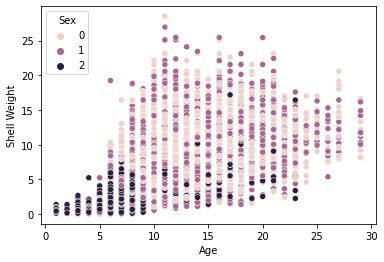

In [34]:
sns.scatterplot(x='Age', y='Shell Weight', hue='Sex', data=df)

<AxesSubplot:xlabel='Age', ylabel='Shucked Weight'>

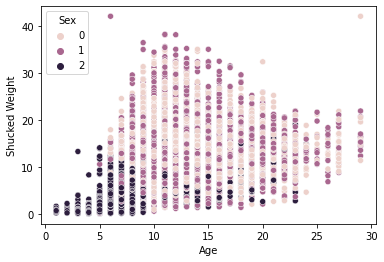

In [35]:
sns.scatterplot(x='Age', y='Shucked Weight', hue='Sex', data=df)

<AxesSubplot:xlabel='Age', ylabel='Viscera Weight'>

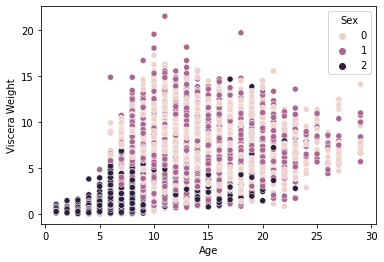

In [36]:
sns.scatterplot(x='Age', y='Viscera Weight', hue='Sex', data=df)

# Correlation Analysis

In [37]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(df, 'Sex')

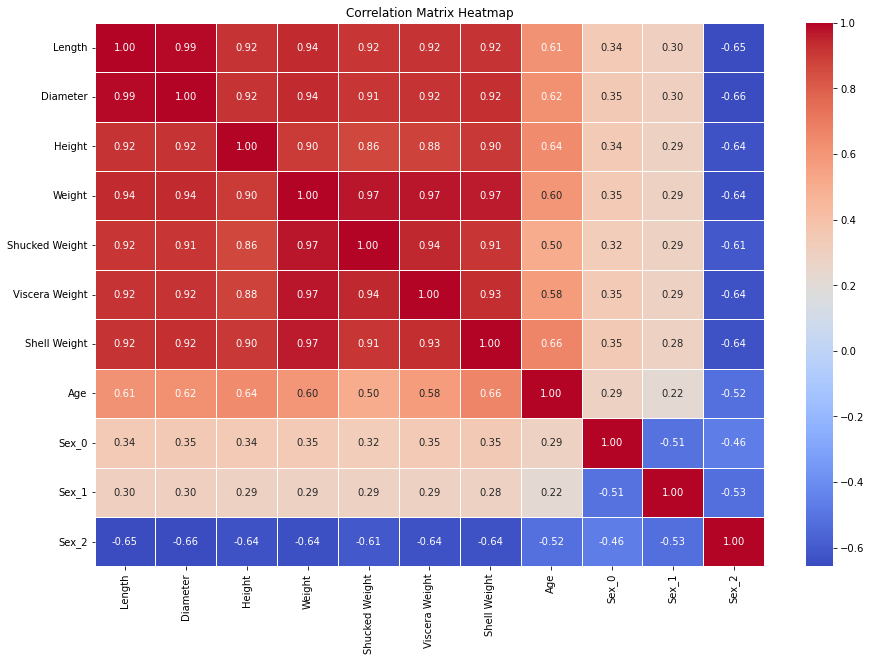

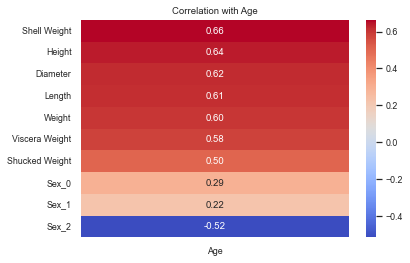

In [38]:
# Compute the correlation matrix
correlation_matrix = data.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['Age'].drop('Age')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Age')
plt.show()

Shell Weight (0.66) has the most positive relationship with Age. This indicates that as the shell weight grows, so does the creature's age. The correlation is moderately strong, indicating a meaningful association.</br>

Height (0.64), like Age, has a high positive connection. The age of the creature seems to rise with its height.</br>

Diameter (0.62), Length (0.61), Weight (0.61), and Viscera Weight (0.58): These all exhibit positive associations with Age, implying that as these metrics grow, so does the creature's age. The correlations are rather strong, showing that there is a meaningful link.</br>

Shucked Weight (0.50) has a moderately positive relationship with Age. The shucked weight seems to raise the creature's age, but the association is not as strong as the other parameters.</br>

Sex_F (0.29): This indicates that females are older than men, but the correlation is weak, showing that gender is not a major predictor of age in this situation.</br>

Sex_M (0.22): This indicates that men are younger than females, but the correlation is weak, showing that sex is not a powerful predictor of age.</br>

Age has a moderate negative connection with Sex_I(-0.52). Individuals categorised as "I" are likely to be younger. The negative correlation shows that the creature's chance of being "I" increases.

# Dropping the target column

In [39]:
x = df.drop(columns=["Age"])
y = df["Age"]

# Dividing the dataset into test and train

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [41]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (49614, 8)
x_test - >   (24437, 8)
y_train - >   (49614,)
y_test - >   (24437,)


In [42]:
training_score = []
testing_score = []

# Model building

In [43]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

# Linear Regression

In [44]:
model_prediction(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 54.510029666416806
r2_Score of LinearRegression() model on Testing Data is: 55.23567635544823


# Decisiontree Regressor

In [45]:
model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 100.0
r2_Score of DecisionTreeRegressor() model on Testing Data is: 13.136244925492257


# Randomforest Regressor

In [46]:
model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 93.70870648416508
r2_Score of RandomForestRegressor() model on Testing Data is: 56.50063352262935


# Adaboost Regressor

In [48]:
model_prediction(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 17.532101499695052
r2_Score of AdaBoostRegressor() model on Testing Data is: 17.904327996313686


# Gradientboosting Regressor

In [49]:
model_prediction(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 58.545846408363246
r2_Score of GradientBoostingRegressor() model on Testing Data is: 58.127882247238816


# LGBM Regressor

In [50]:
model_prediction(LGBMRegressor())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1317
[LightGBM] [Info] Number of data points in the train set: 49614, number of used features: 8
[LightGBM] [Info] Start training from score 9.977607
r2_Score of LGBMRegressor() model on Training Data is: 62.55497017443592
r2_Score of LGBMRegressor() model on Testing Data is: 58.88238922093139


# XGB Regressor

In [51]:
model_prediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 69.09648422221018
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

# Catboost Regressor

In [52]:
model_prediction(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x0000026818894160> model on Training Data is: 65.28564983642518
r2_Score of <catboost.core.CatBoostRegressor object at 0x0000026818894160> model on Testing Data is: 58.928092606572434


In [53]:
models = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","Gradient Boost","LGBM","XGBoost","CatBoost"]

In [54]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

# Accuracy PLot

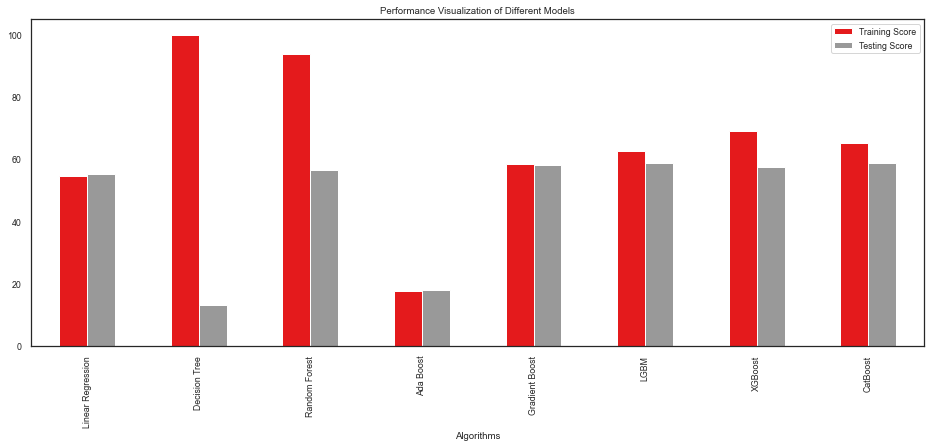

In [55]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

# Prediction

In [56]:
from sklearn.metrics import mean_absolute_error
# Instantiate the model
cat_model = CatBoostRegressor()

# Fit the model to the training data
cat_model.fit(x_train, y_train)

# Use the model to make predictions on the test data
y_pred = cat_model.predict(x_test)

# Calculate the mean absolute error of the model
score = mean_absolute_error(y_test, y_pred)
score

Learning rate set to 0.075873
0:	learn: 3.0606465	total: 13.5ms	remaining: 13.5s
1:	learn: 2.9622820	total: 26ms	remaining: 13s
2:	learn: 2.8790779	total: 40.8ms	remaining: 13.5s
3:	learn: 2.8030472	total: 55.4ms	remaining: 13.8s
4:	learn: 2.7329001	total: 67.1ms	remaining: 13.4s
5:	learn: 2.6697214	total: 79.4ms	remaining: 13.2s
6:	learn: 2.6106736	total: 89.9ms	remaining: 12.8s
7:	learn: 2.5597765	total: 102ms	remaining: 12.7s
8:	learn: 2.5146316	total: 112ms	remaining: 12.4s
9:	learn: 2.4732141	total: 123ms	remaining: 12.2s
10:	learn: 2.4373214	total: 133ms	remaining: 12s
11:	learn: 2.4065020	total: 143ms	remaining: 11.8s
12:	learn: 2.3783747	total: 155ms	remaining: 11.7s
13:	learn: 2.3543971	total: 165ms	remaining: 11.6s
14:	learn: 2.3312203	total: 177ms	remaining: 11.6s
15:	learn: 2.3111205	total: 189ms	remaining: 11.6s
16:	learn: 2.2928079	total: 202ms	remaining: 11.7s
17:	learn: 2.2763464	total: 213ms	remaining: 11.6s
18:	learn: 2.2603539	total: 224ms	remaining: 11.6s
19:	learn:

166:	learn: 2.0288211	total: 1.82s	remaining: 9.1s
167:	learn: 2.0287157	total: 1.83s	remaining: 9.08s
168:	learn: 2.0284412	total: 1.84s	remaining: 9.07s
169:	learn: 2.0282063	total: 1.85s	remaining: 9.05s
170:	learn: 2.0277473	total: 1.86s	remaining: 9.04s
171:	learn: 2.0272780	total: 1.87s	remaining: 9.02s
172:	learn: 2.0271497	total: 1.88s	remaining: 9.01s
173:	learn: 2.0270385	total: 1.89s	remaining: 8.99s
174:	learn: 2.0265074	total: 1.9s	remaining: 8.98s
175:	learn: 2.0260371	total: 1.91s	remaining: 8.96s
176:	learn: 2.0259322	total: 1.92s	remaining: 8.94s
177:	learn: 2.0257104	total: 1.93s	remaining: 8.93s
178:	learn: 2.0253266	total: 1.95s	remaining: 8.92s
179:	learn: 2.0247838	total: 1.95s	remaining: 8.9s
180:	learn: 2.0245507	total: 1.96s	remaining: 8.88s
181:	learn: 2.0244526	total: 1.97s	remaining: 8.87s
182:	learn: 2.0238081	total: 1.98s	remaining: 8.85s
183:	learn: 2.0233748	total: 1.99s	remaining: 8.84s
184:	learn: 2.0229291	total: 2s	remaining: 8.83s
185:	learn: 2.0225

337:	learn: 1.9791280	total: 3.29s	remaining: 6.44s
338:	learn: 1.9790126	total: 3.3s	remaining: 6.43s
339:	learn: 1.9788512	total: 3.31s	remaining: 6.42s
340:	learn: 1.9785467	total: 3.31s	remaining: 6.4s
341:	learn: 1.9782936	total: 3.32s	remaining: 6.39s
342:	learn: 1.9780758	total: 3.33s	remaining: 6.38s
343:	learn: 1.9778172	total: 3.34s	remaining: 6.37s
344:	learn: 1.9775572	total: 3.35s	remaining: 6.36s
345:	learn: 1.9773790	total: 3.36s	remaining: 6.35s
346:	learn: 1.9772252	total: 3.37s	remaining: 6.34s
347:	learn: 1.9769813	total: 3.38s	remaining: 6.32s
348:	learn: 1.9768015	total: 3.38s	remaining: 6.31s
349:	learn: 1.9765018	total: 3.39s	remaining: 6.3s
350:	learn: 1.9762244	total: 3.4s	remaining: 6.29s
351:	learn: 1.9759764	total: 3.41s	remaining: 6.28s
352:	learn: 1.9759589	total: 3.42s	remaining: 6.27s
353:	learn: 1.9756585	total: 3.43s	remaining: 6.26s
354:	learn: 1.9753964	total: 3.44s	remaining: 6.25s
355:	learn: 1.9751217	total: 3.45s	remaining: 6.24s
356:	learn: 1.97

514:	learn: 1.9422126	total: 4.73s	remaining: 4.46s
515:	learn: 1.9420790	total: 4.74s	remaining: 4.45s
516:	learn: 1.9418872	total: 4.75s	remaining: 4.44s
517:	learn: 1.9416528	total: 4.76s	remaining: 4.43s
518:	learn: 1.9413559	total: 4.77s	remaining: 4.42s
519:	learn: 1.9411345	total: 4.77s	remaining: 4.41s
520:	learn: 1.9409121	total: 4.78s	remaining: 4.4s
521:	learn: 1.9408039	total: 4.79s	remaining: 4.39s
522:	learn: 1.9405957	total: 4.8s	remaining: 4.38s
523:	learn: 1.9404569	total: 4.81s	remaining: 4.37s
524:	learn: 1.9401687	total: 4.82s	remaining: 4.36s
525:	learn: 1.9399565	total: 4.82s	remaining: 4.35s
526:	learn: 1.9399274	total: 4.83s	remaining: 4.34s
527:	learn: 1.9396316	total: 4.84s	remaining: 4.33s
528:	learn: 1.9394497	total: 4.85s	remaining: 4.32s
529:	learn: 1.9392289	total: 4.86s	remaining: 4.31s
530:	learn: 1.9389964	total: 4.86s	remaining: 4.29s
531:	learn: 1.9386957	total: 4.87s	remaining: 4.29s
532:	learn: 1.9385230	total: 4.88s	remaining: 4.28s
533:	learn: 1.

695:	learn: 1.9118173	total: 6.2s	remaining: 2.71s
696:	learn: 1.9115772	total: 6.21s	remaining: 2.7s
697:	learn: 1.9115635	total: 6.22s	remaining: 2.69s
698:	learn: 1.9115154	total: 6.23s	remaining: 2.68s
699:	learn: 1.9112705	total: 6.23s	remaining: 2.67s
700:	learn: 1.9109880	total: 6.24s	remaining: 2.66s
701:	learn: 1.9107895	total: 6.25s	remaining: 2.65s
702:	learn: 1.9105754	total: 6.26s	remaining: 2.65s
703:	learn: 1.9104148	total: 6.27s	remaining: 2.64s
704:	learn: 1.9101961	total: 6.28s	remaining: 2.63s
705:	learn: 1.9100062	total: 6.29s	remaining: 2.62s
706:	learn: 1.9098175	total: 6.3s	remaining: 2.61s
707:	learn: 1.9095797	total: 6.3s	remaining: 2.6s
708:	learn: 1.9094537	total: 6.31s	remaining: 2.59s
709:	learn: 1.9093672	total: 6.32s	remaining: 2.58s
710:	learn: 1.9091596	total: 6.33s	remaining: 2.57s
711:	learn: 1.9090390	total: 6.34s	remaining: 2.56s
712:	learn: 1.9088664	total: 6.35s	remaining: 2.55s
713:	learn: 1.9088606	total: 6.35s	remaining: 2.54s
714:	learn: 1.908

856:	learn: 1.8884876	total: 7.51s	remaining: 1.25s
857:	learn: 1.8883648	total: 7.52s	remaining: 1.24s
858:	learn: 1.8883357	total: 7.53s	remaining: 1.24s
859:	learn: 1.8881430	total: 7.54s	remaining: 1.23s
860:	learn: 1.8879741	total: 7.55s	remaining: 1.22s
861:	learn: 1.8879179	total: 7.56s	remaining: 1.21s
862:	learn: 1.8877715	total: 7.57s	remaining: 1.2s
863:	learn: 1.8876188	total: 7.57s	remaining: 1.19s
864:	learn: 1.8873992	total: 7.58s	remaining: 1.18s
865:	learn: 1.8872355	total: 7.59s	remaining: 1.17s
866:	learn: 1.8870617	total: 7.6s	remaining: 1.17s
867:	learn: 1.8869354	total: 7.61s	remaining: 1.16s
868:	learn: 1.8868053	total: 7.62s	remaining: 1.15s
869:	learn: 1.8867559	total: 7.63s	remaining: 1.14s
870:	learn: 1.8867173	total: 7.63s	remaining: 1.13s
871:	learn: 1.8864772	total: 7.64s	remaining: 1.12s
872:	learn: 1.8863645	total: 7.65s	remaining: 1.11s
873:	learn: 1.8861512	total: 7.66s	remaining: 1.1s
874:	learn: 1.8859922	total: 7.67s	remaining: 1.09s
875:	learn: 1.8

1.4049496256403158

In [57]:
from sklearn.metrics import mean_absolute_error
# Instantiate the model
gb_model = GradientBoostingRegressor()

# Fit the model to the training data
gb_model.fit(x_train, y_train)

# Use the model to make predictions on the test data
gb_y_pred = gb_model.predict(x_test)

# Calculate the mean absolute error of the model
score = mean_absolute_error(y_test, gb_y_pred)
score

1.423003784522968

In [58]:
from sklearn.metrics import mean_absolute_error
# Instantiate the model
lgbm_model = LGBMRegressor()

# Fit the model to the training data
lgbm_model.fit(x_train, y_train)

# Use the model to make predictions on the test data
y_pred = lgbm_model.predict(x_test)

# Calculate the mean absolute error of the model
score = mean_absolute_error(y_test, y_pred)
score

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1317
[LightGBM] [Info] Number of data points in the train set: 49614, number of used features: 8
[LightGBM] [Info] Start training from score 9.977607


1.4047858888263385

In [59]:
test_df=pd.read_csv("C:\\Users\\sohin\\OneDrive\\Documents\\Kaggle Dataset\\test.csv\\test.csv")

In [60]:
sample_sub=pd.read_csv("C:\\Users\\sohin\\OneDrive\\Documents\\Kaggle Dataset\\sample_submission.csv")
sample_sub

,id,Age
0,74051,10
1,74052,10
2,74053,10
3,74054,10
4,74055,10
...,...,...
49363,123414,10
49364,123415,10
49365,123416,10
49366,123417,10


In [61]:
test_df['Sex'] = test_df['Sex'].map({'F': 0, 'M': 1,'I':2})

In [62]:
prediction=cat_model.predict(test_df.drop("id",axis=1))
prediction

array([ 7.3300931 ,  7.68378105, 10.99535997, ..., 13.33633524,
        9.82719008, 12.33106507])

In [63]:
submission=pd.DataFrame({"id":test_df.id,"Age":prediction})
submission.head()

,id,Age
0,74051,7.330093
1,74052,7.683781
2,74053,10.995360
3,74054,9.401559
4,74055,7.426228


In [64]:
submission.to_csv('submission_cat.csv',index=False)